# AKA Bayesian t-tests<br>one step up from the simplest toy models

## Part A: just $\theta$<br><u>[is a "Bayesian Z-test"]</u>


### 1. What is the density of a normal distribution<br>for n samples? 


### 2. What is this if all normalizing constants are removed and ONLY $\theta$ is a random variable? 

#### *This is actually just asking for $p(\theta|\textbf{x}) \propto p(\textbf{x},\theta)$*<br>which is just $p(\textbf{x},\theta)$ viewed only as a function of $\theta$ with $\textbf{x}$ given<br>*(which means $\textbf{x}$ is known because it's been observed)*

$$\large 
\begin{align*}
\prod_{i=1}^n\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x_i-\theta)^2} &={} (2\pi\sigma^2)^{-\frac{n}{2}} e^{-\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i-\theta)^2}\\
&\propto{} \cdots
\end{align*}
$$


### 3. What distribution do you think this $\theta$ has?

$$\large 
\begin{align*}
\prod_{i=1}^n\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x_i-\theta)^2} &={} (2\pi\sigma^2)^{-\frac{n}{2}} e^{-\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i-\theta)^2}\\
&\propto{} e^{-\frac{1}{2\sigma^2} \sum_{i=1}^n \theta^2 -2x_i\theta }\\
&={} e^{-\frac{1}{2\frac{\sigma^2}{n}} \theta^2 -2\bar x \theta }\\
&\propto{} e^{-\frac{1}{2\frac{\sigma^2}{n}} \theta^2 -2\bar x \theta } e^{-\frac{1}{2\frac{\sigma^2}{n}}\bar x^2}\\
& = {} e^{-\frac{1}{2\frac{\sigma^2}{n}} (\theta - \bar x)^2} \propto \frac{1}{\sqrt{2\pi\frac{\sigma^2}{n}}} e^{-\frac{1}{2\frac{\sigma^2}{n}} (\theta - \bar x)^2} \\ 
\textrm{So} & \;\;\; \theta \sim N\left(\bar x, \frac{\sigma^2}{n}]\right)
\end{align*}
$$



### 4. If $\theta$ has the *improper prior* $p(\theta) \propto 1$<br>what is the *posterior distribution* of $\theta$<br>and is it actually *proper* this time?

$$\LARGE
\begin{align*}
p(\theta|\mathbf{x}) &\propto{} f(\mathbf{x}|\theta)p(\theta)\\
&\propto{} \prod_{i=1}^n\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x_i-\theta)^2} \times 1\\
&\propto{} \frac{1}{\sqrt{2\pi\frac{\sigma^2}{n}}} e^{-\frac{1}{2\frac{\sigma^2}{n}} (\theta - \bar x)^2} 
\end{align*}
$$


### 5. How will you provide Bayesian inference for $\theta$ given sample $\textbf{x}$?<br>Let's

In [2]:
# Yes, let's

from scipy import stats
n = 1000
x = stats.norm(loc=0, scale=1).rvs(n)
x.mean()

0.05751538501055189

In [3]:
post = stats.norm(loc=x.mean(), scale=1/n**0.5)
m = 10000
theta = post.rvs(m)
theta.mean()

0.05705099920375745

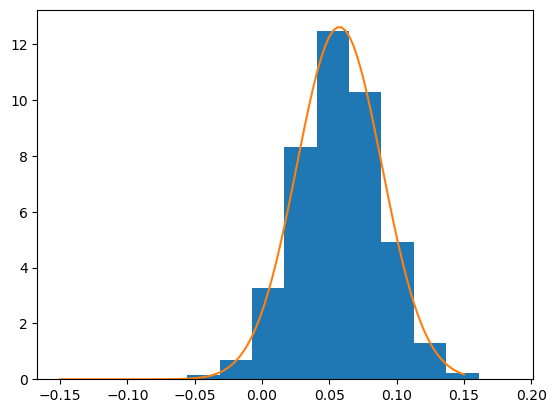

In [4]:
import matplotlib.pyplot as plt
import numpy as np

theta_support = np.linspace(-.15,.15,100)
plt.hist(theta, density=True)
plt.plot(theta_support, post.pdf(theta_support))

In [5]:
np.quantile(theta, [0.025, 0.975])  
# our BELIEF that theta from which the data was generated
# based on our initial prior (beliefs), model (assumptions), and observed data
# is that there's (approximately due to sampling variation) a 95% probability that
# theta lies in this interval, probability being the natural way to express belief

array([-0.00370903,  0.11860163])

## Part B: *precision* $\tau$ rather than variance $\sigma^2$<br><u>[is still just a "Bayesian Z-test"]</u>

### For some convenience let's change to a *precision* $\tau=\sigma^2$ notation...<br>but still assume $\theta$ is the only random variable

### 1. Now what if $p(\theta)$ is $N(\theta_0, \tau^2_0)$?

$$\Large
\begin{align*}
p(\theta|\mathbf{x}) &\propto{} f(\mathbf{x}|\theta)p(\theta)\\
&\propto{} \prod_{i=1}^n\sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau}{2}(x_i-\theta)^2}\sqrt{\frac{\tau_0}{2\pi}} e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2} \\
&\propto{} \cdots
\end{align*}
$$


$$\Large
\begin{align*}
p(\theta|\mathbf{x}) &\propto{} f(\mathbf{x}|\theta)p(\theta)\\
&\propto{} \prod_{i=1}^n\sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau}{2}(x_i-\theta)^2}\sqrt{\frac{\tau_0}{2\pi}} e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2}\\
&\propto{} e^{-\frac{\tau}{2}  \sum_{i=1}^n (x_i-\theta)^2} e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2}\\
&\propto{} e^{-\frac{\tau}{2}  \sum_{i=1}^n\theta^2 -2\theta x_i} e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2}\\
&\propto{} e^{-\frac{\tau}{2} n\theta^2 -2\theta \sum_{i=1}^n x_i} e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2}\\
&\propto{} e^{-\frac{\tau n}{2} \left( \theta^2 -2\theta \bar x \right)} e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2}\\
&\propto{} e^{-\frac{1}{2} [ ( \tau n\theta^2 - 2  \tau n\bar x \theta) + (\tau_0 \theta^2-2\tau_0\theta\theta_0)  ] }\\
& = {} e^{-\frac{1}{2} [ \theta^2 (\tau n+\tau_0) - 2 \theta (n\tau\bar x + \tau_0 \theta_0) ] }\\
& = {} e^{-\frac{1}{2} \frac{\tau n+\tau_0}{\tau n+\tau_0} [ \theta^2 (\tau n+\tau_0) - 2 \theta (n\tau\bar x + \tau_0 \theta_0) ] } \\
& = {} e^{-\frac{\tau n+\tau_0}{2}  \left[ \theta^2  - 2 \theta \left(\frac{n\tau\bar x + \tau_0 \theta_0}{\tau n+\tau_0}\right) \right] } = e^{-\frac{\tau n+\tau_0}{2}  \left[ \theta^2  - 2 \theta \left(\frac{n\bar x + \frac{\tau_0}{\tau} \theta_0}{ n+\frac{\tau_0}{\tau}}\right) \right] } \\
\end{align*}
$$


### 2. Do you recognize this? If so we can stop here...<br>Let's

### <u>What is distribution does the posterior have?<br>What is it's mean? What is it's *precision*?</u>

### 3. How much and what information<br>does the prior contribute to the posterior?

#### Interpret $\frac{\tau_0}{\tau}$ as a "number of data points" the prior contributes to the posterior<br>relative to  $n$ the number of data points the likelihoood contributes<br><br>For the multinomial-Dirichlet specification this is done as follows 
$$
\begin{align*}
\textrm{For } \mathbf{x_i} & \sim \textrm{multinomial}(1,\theta) \quad & \sum_{k=1}^K x_{ik} = 1 \quad \sum_{i=1}^n \sum_{k=1}^K x_{ik} = n\\
p(\theta|\mathbf{x}) &\propto{} f(\mathbf{x}|\theta)p(\theta)\\
&\propto{} \prod_{i=1}^n\prod_{k=1}^K\theta_i^{x_{ik}} \prod_{k=1}^K\theta_i^{\alpha_k-1}\\
& = \prod_{k=1}^K\theta_i^{(\sum_{i=1}^n x_{ik}) + \alpha_k-1} & 
y_k = \sum_{i=1}^n x_{ik} \quad \textrm{ is the total } &\\
& = \prod_{k=1}^K\theta_i^{y_k + \alpha_k-1} & \quad \begin{array}{r}\textrm{counts observed for class }k\\\textrm{(contributed through the likelihood)} \end{array} \\
& \quad \textrm{ so $\alpha_k$ is "observed counts"} & \longrightarrow \;\; \textrm{ contributed through the prior }
\end{align*}
$$



## Part C (I): *precision* $\tau$ (but actually this time)<br><u>[so we now can finally have our desired "Bayesian t-test" not assuming $\tau$ is known]</u>

### Still let $\tau=\sigma^2$ but now let's not assume it's known...<br>so we'll need to another prior...

### Let's go back to using $p(\theta) \propto 1$ and add $p(\tau) \propto 1$<br>and we'll assume *a priori indepedence*

$$\LARGE
\begin{align*}
p(\theta,\tau|\mathbf{x}) &\propto{} f(\mathbf{x}|\theta,\tau)p(\theta,\tau)=f(\mathbf{x}|\theta)p(\theta)p(\tau)\\
&\propto{} \prod_{i=1}^n\sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau}{2}(x_i-\theta)^2} \times 1 \times 1\\
\end{align*}
$$


## Part C (II): Full Conditional [Posterior] Distributions

### 1. What is $p(\theta|\tau, \mathbf{x})$?<br>This is a so-called a *full conditional* [posterior distribution]

#### *This is actually just asking for $p(\theta|\tau, \mathbf{x}) \propto p(\textbf{x}, \theta|\tau) \propto p(\textbf{x},\theta,\tau)$*<br>which is just $p(\textbf{x},\theta,\tau)$ viewed only as a function of $\theta$ with $\textbf{x}$ given<br>*(which means $\textbf{x}$ and $\tau$ are known because they've been observed)*

### 2. What is $p(\theta,\tau | \mathbf{x})$ this if all normalizing constants are removed if ONLY $\tau$ is was a random variable? 

#### *This is actually just asking for $p(\tau | \theta, \mathbf{x}) \propto p(\textbf{x},\tau |\theta) \propto p(x,\theta,\tau)$*<br>which is just $p(\textbf{x},\theta,\tau)$ viewed only as a function of $\tau$ with $\textbf{x}$ given<br>*(which means $\textbf{x}$ and $\theta$ are known because they've been observed)*

### That is, what is the *full conditional* [posterior distribution] $p(\tau|\theta, \mathbf{x})$?

$$\Large
\begin{align*}
p(\tau|\theta, \mathbf{x}) &\propto{} f(\mathbf{x}|\theta)p(\tau|\theta)=f(\mathbf{x}|\theta)p(\tau)\\
&\propto{} \prod_{i=1}^n\sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau}{2}(x_i-\theta)^2} \times 1 \\
&\propto{} \tau^{\frac{n}{2}} e^{-\frac{\tau}{2}\sum_{i=1}^n(x_i-\theta)^2} 
\end{align*}
$$


$\Large \tau \sim \large \textrm{gamma}\bigg(\alpha = \frac{n}{2}+1, \textrm{SCALE}= \left(\frac{1}{2} \sum_{i=1}^n (x_i-\mu)^2\right)^{-1} \bigg)$

### 3. What is $p(\tau|\theta, \mathbf{x})$ if we still have $p(\tau) \propto 1$<br>but now $p(\theta)$ is $N(\theta_0, \tau^2_0)$?

## Part C (III): Gibbs Sampling

The canonical example of ***Gibbs sampling*** is the ***normal-gamma*** model and here's a simplified version with $p(\theta,\tau) \propto 1$

$$\begin{align*}
p\left(x|\theta,\tau=\frac{1}{\sigma^2}\right) = {} & \prod_{i=1}^n \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau}{2}(x_i-\theta)^2}\\
p(\theta,\tau) \propto {} & 1 \\
p(\theta,\tau| x) \propto p(\theta,\tau, x) \propto {} &  \tau^{n/2} e^{-\frac{\tau}{2} \sum_{i=1}^n (x_i-\theta)^2} \\
p(\tau|\theta, x) = {} & \text{Gamma}\left(\alpha = \frac{n}{2}+1, \textrm{rate} = \frac{1}{2} \sum_{i=1}^n (x_i-\theta)^2 \right)\\
p(\theta| \tau, x)  \propto {} & e^{-\frac{\tau}{2} \sum_{i=1}^n \theta^2 - 2\theta x_i} =  e^{-\frac{\tau}{2} \left(n\theta^2 - 2\theta \sum_{i=1}^n x_i\right)} = e^{-\frac{\tau n }{2} \left(\theta^2 - 2\theta \bar x\right)}\\
  \propto {} & e^{-\frac{n \tau}{2} (\theta - \bar x)^2} \\
p(\theta| \sigma^2 = \tau^{-1}, x) = {} & N\left(E[\theta] = \bar x, Var(\theta) = \frac{\sigma^2}{n}\right)
\end{align*}$$


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [17]:
# loc is mean and scale is standard deviation
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):
        # https://en.wikipedia.org/wiki/Gamma_distribution
        tau[c,g] = stats.gamma(a=n/2 + 1, scale=2/((x-theta[c,g-1])**2).sum()).rvs()
        theta[c,g] = stats.norm(x.mean(), scale = 1/(tau[c,g]*n)**0.5).rvs()


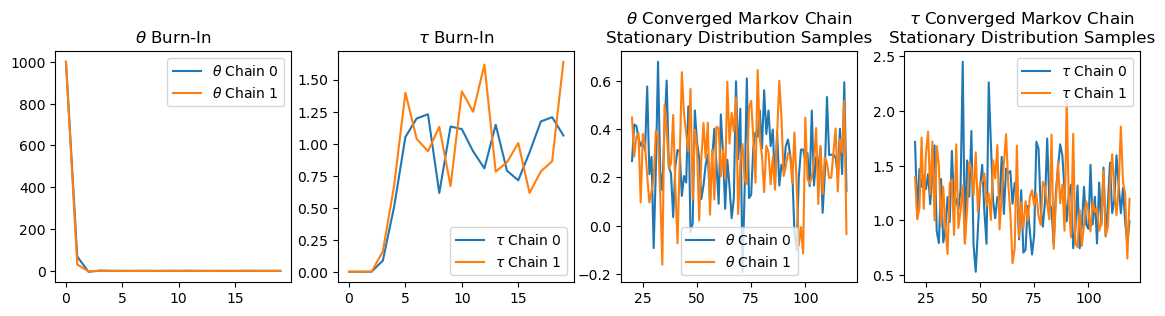

In [18]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();         

### 4. How will you provide Bayesian inference for $\theta$ given sample $\textbf{x}$?<br>Let's


[-0.07550371  0.63238356]
[0.6466004  1.76149054]


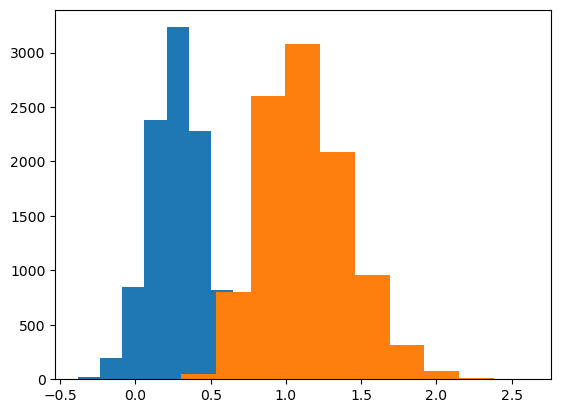

In [19]:
# bayesian inference
plt.hist(theta[0, burn:])
theta_samples = theta[0, burn:]
theta_ci = np.quantile(theta_samples, [0.025, 0.975])
print(theta_ci)

plt.hist(tau[0, burn:])
tau_samples = tau[0, burn:]
tau_ci = np.quantile(tau_samples, [0.025, 0.975])
print(tau_ci)

# Homework

---

### Q1

The *Gibbs sampler* in class for the prior $p(\theta,\tau) \propto 1$ was created by alternatingly sampling from the *full conditional* $p(\theta|\tau,\textbf{x})$ *normal* and  $p(\tau|\theta,\textbf{x})$ *gamma* distributions. Create this *Gibbs sampler* so your code can be used for the sample `x = stats.norm(loc=m, scale=s).rvs(size=n)` for any arbitrary `n`, `m`, and `s`.

*Use the code below or your own code to <u>provide a demonstration of Bayesian inference<u> for this data and model specification.*

### Q2

Derive the *full conditional distributions* $p(\tau|\theta, \mathbf{x})$ and $p(\theta|\tau, \mathbf{x})$ if $p(\theta)$ is $N(\theta_0, \tau^2_0)$ and $p(\tau) \propto \tau^{\frac{\alpha}{2}-1} e^{- \frac{\lambda}{2} \tau}$. 

*Explain how to equate $\alpha$ and $\lambda$ with controlling the amount and nature of information the prior contributes to the posterior. How can we interpret these as controlling a "number of data points" contributed by the prior relative to the number of data points contributed to the posterior through the likelihoood?*

Create an updated version of the *Gibbs sampler* for $N(\theta_0, \tau^2_0)$ and $\textrm{gamma}(\textrm{shape}=\frac{\alpha}{2}, \textrm{rate}=\frac{\lambda}{2})$ priors for $p(\theta)$ and $p(\tau)$ respectively. 

*Demonstrate how changing the prior hyperparameters influences the posterior relative to the sample and the likelihood.*


In [20]:
# loc is mean and scale is standard deviation
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization

def gibbs_sampler(n, m, s, C=2, G=10000):
    """
    Perform Gibbs sampling for theta and tau.
    
    Args:
    - n: Number of data points.
    - m: Mean of the normal distribution.
    - s: Standard deviation of the normal distribution.
    - C: Number of chains.
    - G: Number of Gibbs samples per chain.

    Returns:
    - theta: Array of sampled theta values for all chains.
    - tau: Array of sampled tau values for all chains.
    """
    x = stats.norm(loc=m, scale=s).rvs(size=n)

    theta,tau = np.zeros([C,G]),np.zeros([C,G])
    theta[:, 0] = 1000  # Arbitrary large initial value for theta

    # Gibbs sampling
    for c in range(C):  # For each chain
        for g in range(1, G):
            tau[c, g] = stats.gamma(
                a=n / 2 + 1,
                scale=2 / ((x - theta[c, g - 1]) ** 2).sum()
            ).rvs()
            
            theta[c, g] = stats.norm(
                loc=x.mean(),
                scale=(1 / (tau[c, g] * n)) ** 0.5
            ).rvs()
    
    return theta, tau

theta, tau = gibbs_sampler(30, 3, 5)

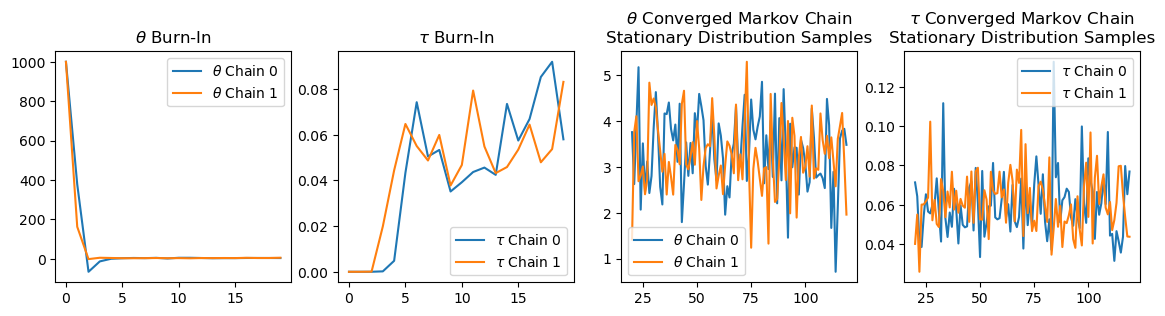

In [21]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); 

[1.77520059 4.77514916]


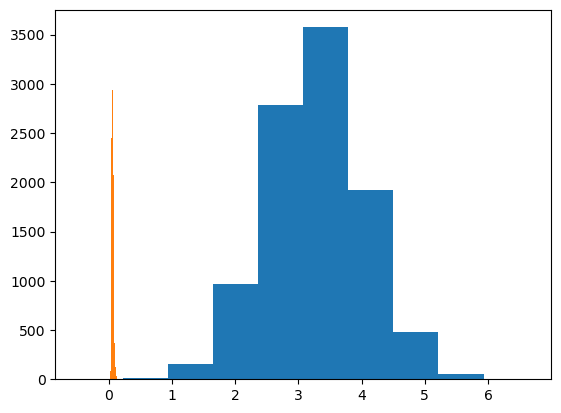

In [29]:
# bayesian inference
plt.hist(theta[0, burn:])
theta_samples = theta[0, burn:]
theta_ci = np.quantile(theta_samples, [0.025, 0.975])
print(theta_ci)

plt.hist(tau[0, burn:])
tau_samples = tau[0, burn:]
tau_ci = np.quantile(tau_samples, [0.025, 0.975])

In [13]:
def updated_gibbs_sampler(n, data, alpha, lambd, theta0, tau0_sq, C=2, G=10000):
    # Initialize storage for theta and tau
    theta = np.zeros((C, G))
    tau = np.zeros((C, G))

    # Initial values for theta
    theta[:, 0] = 1000  # Arbitrary initial value for theta

    for c in range(C):  # For each chain
        for g in range(1, G):
            # Update tau from its full conditional (Gamma distribution)
            posterior_alpha = alpha / 2 + n / 2
            posterior_rate = (
                lambd / 2 + 0.5 * ((data - theta[c, g - 1]) ** 2).sum()
            )
            tau[c, g] = stats.gamma(a=posterior_alpha, scale=1 / posterior_rate).rvs()

            # Update theta from its full conditional (Normal distribution)
            posterior_mean = (
                (data.sum() + theta0 / tau0_sq) /
                (n + 1 / tau0_sq)
            )
            posterior_variance = 1 / (tau[c, g] * n + 1 / tau0_sq)
            theta[c, g] = stats.norm(loc=posterior_mean, scale=posterior_variance**0.5).rvs()

    return theta, tau
n = 30
data = stats.norm(loc=0, scale=1).rvs(size=n)  # Sample data
alpha = 2
lambd = 1
theta0 = 0
tau0_sq = 1

# Run updated Gibbs sampler
theta, tau = updated_gibbs_sampler(n, data, alpha, lambd, theta0, tau0_sq)


[-0.08226559  0.62423928]


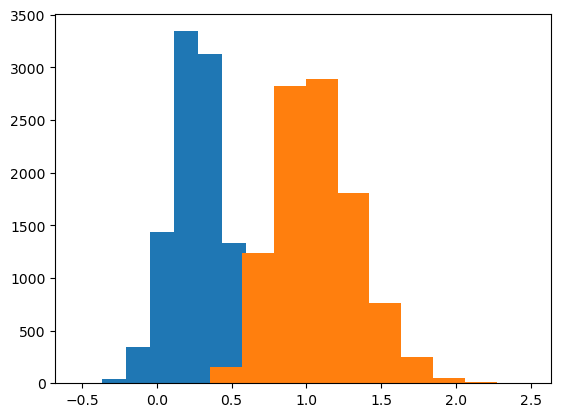

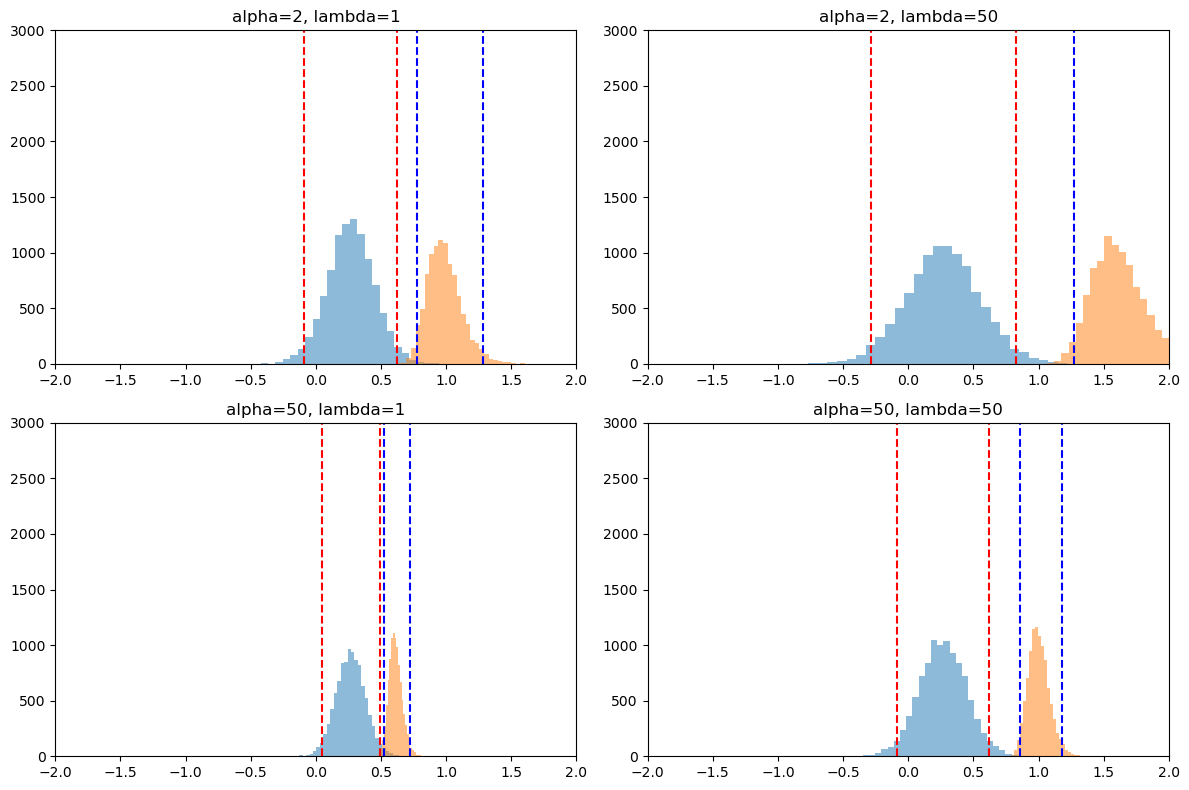

In [14]:
# bayesian inference
burn = 20
plt.hist(theta[0, burn:])
theta_samples = theta[0, burn:]
theta_ci = np.quantile(theta_samples, [0.025, 0.975])
print(theta_ci)

plt.hist(tau[0, burn:])
tau_samples = 1/(tau[0, burn:])**0.5
tau_ci = np.quantile(tau_samples, [0.025, 0.975])

# Demonstrate how changing the prior hyperparameters influences the posterior relative to the sample and the likelihood
n = 30
hyperparameters = [(2, 1), (2, 50), (50, 1), (50, 50)]
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Second pass to plot with equal scaling
for i, (alpha, lambd) in enumerate(hyperparameters):
    theta, tau = updated_gibbs_sampler(n, data, alpha, lambd, theta0, tau0_sq)
    theta_samples = theta[0, burn:]
    tau_samples = 1 / (tau[0, burn:]) ** 0.5
    theta_ci = np.quantile(theta_samples, [0.025, 0.975])
    tau_ci = np.quantile(tau_samples, [0.025, 0.975])

    ax[i // 2, i % 2].hist(theta_samples, bins=30, alpha=0.5)
    ax[i // 2, i % 2].set_xlim(-2, 2)
    ax[i // 2, i % 2].set_ylim(0, 3000)  # Adjust the y-axis limit as needed
    ax[i // 2, i % 2].set_title(f"alpha={alpha}, lambda={lambd}")
    ax[i // 2, i % 2].axvline(theta_ci[0], color="red", linestyle="--")
    ax[i // 2, i % 2].axvline(theta_ci[1], color="red", linestyle="--")
    # tau visualization
    ax[i // 2, i % 2].hist(tau_samples, bins=30, alpha=0.5)
    ax[i // 2, i % 2].set_xlim(-2, 2)
    ax[i // 2, i % 2].set_ylim(0, 3000)  # Adjust the y-axis limit as needed
    ax[i // 2, i % 2].axvline(tau_ci[0], color="blue", linestyle="--")
    ax[i // 2, i % 2].axvline(tau_ci[1], color="blue", linestyle="--")

plt.tight_layout()
plt.show()




### Q3

*Read the following "conversation". My reactions to this initial text I was provied with are the colored font. Then either (A) provide an analagous derivation of this result for the multinomial-Dirichlet specification, or (B) just report that if the prior is a proper distribution then the posterior is proportional to the joint distribution as Bayes Theorem tells us and describe how one might therefore identify the exact distribution of the posterior by just looking at the joint but that finally all this is moot and beside the point because as Bayesians we're going to trade any functional forms of distributions for samples from those distributions to just make histograms and belief (credible interval probability) statements based on those anyway...*

Suppose we have the following model setup:
\begin{align*}
    x_1,...,x_n &\overset{iid}{\sim} \text{Bernoulli}(\theta)\\
    \theta &\sim \text{Beta}(a, b)
\end{align*}

The joint likelihood distribution of ~~x_1,...,x_n~~ <span style='color:red'> $\sum_i x_i$</span> $| \theta$ is $\text{Binomial}(n, \theta)$. Now, let's consider the posterior:
\begin{align*}
    p(\theta | x_1,...,x_n) &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{p(x_1,...,x_n)} = \color{red}{\frac{p(\mathbf{x} | \theta)p(\theta)}{p(\mathbf{x})}}\\
    &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\int p(x_1,...,x_n | \theta )p(\theta) d\theta} = \color{red}{\frac{p(\mathbf{x}| \theta)p(\theta)}{\int p(\mathbf{x} | \theta )p(\theta) d\theta}}
\end{align*}

We can directly calculate the above if the denominator is finite. We tend to use proportionality arguments in this class, but to build some intuition <span style='color:red'>Bayes theorem is $p(\theta | \mathbf{x}) = \frac{p(\mathbf{x} | \theta )p(\theta)}{p(x)}$ and (if we know $\mathbf{x}$) then $p(\mathbf{x})$ is a constant so we must gather all $\theta$ related terms in our mathematical expression (dropping anything else which is any other constant) and see if we know of any statistical distribution that when scaled by a constant could exactly replicate our math as a function of $\theta$</span>, <span style='color:blue'>but if by "intuition" you mean the next 10 lines of derivation because you refuse to believe that the posterior is proportional to the joint (for proper priors) as Bayes Theorem claims</span> let's formally calculate that integral for the Beta-Binomial problem:

$\scriptsize
\begin{align*}
    \int p(\overset{\color{red}{\textrm{You meant } \sum_i x_i}}{x_1,...,x_n} | \theta )p(\theta) d\theta &= \int_0^1 \color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}} \overset{\color{blue}{\textrm{just this alone is a Bernoulli likelihood}}}{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\int_0^1 \theta^{\sum_i x_i + a - 1}(1-\theta)^{n-\sum_i x_i + b - 1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}\int_0^1 \frac{\Gamma(a+b+n)}{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}\theta^{\sum_i x_i + a - 1}(1-\theta)^{n-\sum_i x_i + b - 1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}\\& \text{ (because we have written the density formula above, which integrates to } 1)\\    
  & \color{blue}{\textrm{(But why stop there shouldn't we prove the integral is equal to 1 for "intuition"?)}}\\
    & \color{red}{\textrm{(if "intuition" may assume a density has area 1 then prove or believe Bayes Theorem)}}\\
    & \color{purple}{\textrm{Proof: $p(\theta|\mathbf{x})p(\mathbf{x}) = p(\mathbf{x}|\theta)p(\theta) \Rightarrow p(\theta|\mathbf{x}) = \frac{p(\mathbf{x}|\theta)p(\theta)}{p(\mathbf{x})}$}} \\    
    & \color{green}{\textrm{(Bayes Theorem is the formula for a posterior distribution if the prior is proper)}}\\
    & \color{blue}{\textrm{(If you believe it then the posterior is proportional to the joint and must have area 1)}}\\
    & \color{red}{\textrm{(Can you recognize what distribution for $\theta$ would be proportional to the given joint?)}}\\
    & \color{green}{\textrm{(There's only gonna be one... can't be two... can you find one distribution that does it?)}}\\
\end{align*}$

Now, we can directly plug in to our Bayes formula to directly calculate the posterior:

$\begin{align*}
    p(\theta | x_1,...,x_n) &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\int p(x_1,...,x_n | \theta )p(\theta) d\theta} \\
    &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}} \overset{\color{blue}{\textrm{just this alone is a Bernoulli likelihood}}}{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}}{\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i} \theta^{a-1}(1-\theta)^{b-1}}{\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\Gamma(a+b+n)}{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}\theta^{\sum_i x_i + a-1}(1-\theta)^{n-\sum_i x_i+b-1} \\
    &= \text{Beta}(a+ \sum_i x_i, b + n - \sum_i x_i)
\end{align*}$

<span style='color:blue'>
So the structure of this "proof" providing the right kind of "intution" you'll apparently need to feel comfortable and safe about proportionality (if believing that the posterior is proportional to the joint as Bayes Theorem claims is a step too far for you) is...</span>

$\color{green}{\require{cancel}
\begin{align}
\frac{p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta}) d\boldsymbol{\theta}} &={} \frac{\cancel{c_xc_\theta} c p(\boldsymbol{\theta}|\textbf{x})}{\cancel{c_xc_\theta} \int c p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}}\\
&={} \frac{c p(\boldsymbol{\theta}|\textbf{x})}{ c \int \xcancel{\frac{1}{c} c} p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}} =  \frac{c p(\boldsymbol{\theta}|\textbf{x})}{ c \cancel{\int p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}}^1} = \frac{\xcancel{c} p(\boldsymbol{\theta}|\textbf{x})}{ \xcancel{c} } = p(\boldsymbol{\theta}|\textbf{x})\\
\end{align}}
$

<span style='color:blue'>
Or here's an even more direct way to show this...
</span>

$\color{red}{
\begin{align*}
\frac{p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta}) d\boldsymbol{\theta}}
 &={} \frac{p(\boldsymbol{\theta}|\textbf{x})p(\textbf{x})}{p(\textbf{x})} \\
  &={} p(\boldsymbol{\theta}|\textbf{x})
\end{align*}}
$    



We can see that when we have ~~**conjugate** priors (where the prior and posterior have the same form)~~ <u>**just any (propor) prior**</u>, the denominator in Bayes rule amounts to any normalizing constants in the likelihood and prior (that allow for the densities to integrate to 1 times the inverse of the equivalent normalizing constant of the posterior. Once we plug this back in to Bayes formula and cancel and rearrange terms, this amounts to multiplying the normalizing constant of the posterior with the portion of the posterior that relies on the parameter. This sort of derivation isn't unique to conjugate priors; as long as we can recognize the family in which the product of the prior and likelihood belong to, the integral in the denominator can be solved by simplifying the term in the integral to the precise density (which occurs by moving normalizing constants outside of the integral, and introducing the normalizing constant for that new density). This is the technique we used to solve the integral above.

As a result, we can use a proportionality argument to skip all of these mathematical derivations. If we can recognize the functional form of the product between the likelihood and prior as being in the family of another probability distribution, then that is equivalent to moving around these normalizing constants to simplify integrals.

